In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

# Context and description of the data

1.Background information on the subject and field of study

2.Information about data collection:

a. Who collected the data

b. When the data was collected

c. How the data was collected

d. Any implications this may have on analysis

The data explores the detailed information of housing located in 351 suburbs in Melhourne. Melbourne is the second-most populous city in Australia, which has prosperous education, economy, entertainment, tourism and etc. Usually, the price of housing varies in a large range, especially in a big city like Melbourne, depends on furnishment, sqft, distance to CBD and neighborhood. We are interested in what partern of housing characteristics will affect the price at different suburbs in Melbourne ciy.

# Exploratory Analysis of the Data

1.Summary statistics and the distributional shape of variables in the data

2.Unusual features or outliers present in the data

3.Potential relationships that may exist in the data, including, but not limited to:
  
  a. two-way tables and side-by-side bar charts for relationships between categorical data

  b. scatter plots for relationships between numeric data

  c. side-by-side histograms or boxplots for relationships between numeric and categorical data

4.Findings should be reported with readable tables or clearly labeled graphs.

5.There must also be text to explain the findings and the included tables.

In [93]:
df = pd.read_csv("Melbourne_housing_FULL.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

__Clean Data__

In [94]:
df = df.loc[((df['Rooms'].isnull() == False) & 
             (df['Price'].isnull() == False) & 
             (df['Distance'].isnull() == False) & 
             (df['Bedroom2'].isnull() == False) & 
             (df['Bathroom'].isnull() == False) & 
             (df['Car'].isnull() == False) & 
             (df['BuildingArea'].isnull() == False) & 
             (df['YearBuilt'].isnull() == False)), 
            ["Rooms","Price","Distance","Bedroom2","Bathroom","Car","BuildingArea","YearBuilt","Type","Method","Suburb"]]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10079 entries, 2 to 34856
Data columns (total 11 columns):
Rooms           10079 non-null int64
Price           10079 non-null float64
Distance        10079 non-null float64
Bedroom2        10079 non-null float64
Bathroom        10079 non-null float64
Car             10079 non-null float64
BuildingArea    10079 non-null float64
YearBuilt       10079 non-null float64
Type            10079 non-null object
Method          10079 non-null object
Suburb          10079 non-null object
dtypes: float64(7), int64(1), object(3)
memory usage: 944.9+ KB


In [99]:
df["yeargroup"] = pd.cut(df.YearBuilt,bins=np.arange(1195,2020,10),right=False)
summary = df.groupby('yeargroup')[["Price"]].mean()
summary = summary.dropna()
print(summary)
print(summary.shape)

                     Price
yeargroup                 
[1195, 1205)  1.200000e+06
[1825, 1835)  8.550000e+05
[1845, 1855)  1.837750e+06
[1855, 1865)  2.516111e+06
[1865, 1875)  8.450000e+05
[1875, 1885)  1.898669e+06
[1885, 1895)  1.664905e+06
[1895, 1905)  1.454767e+06
[1905, 1915)  1.589756e+06
[1915, 1925)  1.576562e+06
[1925, 1935)  1.560048e+06
[1935, 1945)  1.417308e+06
[1945, 1955)  1.128274e+06
[1955, 1965)  9.446568e+05
[1965, 1975)  8.079259e+05
[1975, 1985)  8.595550e+05
[1985, 1995)  9.226303e+05
[1995, 2005)  9.515653e+05
[2005, 2015)  9.374073e+05
(19, 1)


In [142]:
index = [1195,1825,1845, 1855, 1865, 1875, 1885, 
         1895, 1905, 1915, 1925, 1935, 1945, 1955, 
         1965, 1975, 1985, 1995, 2005]
print(index)
summary.index = index
print(summary)

[1195, 1825, 1845, 1855, 1865, 1875, 1885, 1895, 1905, 1915, 1925, 1935, 1945, 1955, 1965, 1975, 1985, 1995, 2005]
             Price
1195  1.200000e+06
1825  8.550000e+05
1845  1.837750e+06
1855  2.516111e+06
1865  8.450000e+05
1875  1.898669e+06
1885  1.664905e+06
1895  1.454767e+06
1905  1.589756e+06
1915  1.576562e+06
1925  1.560048e+06
1935  1.417308e+06
1945  1.128274e+06
1955  9.446568e+05
1965  8.079259e+05
1975  8.595550e+05
1985  9.226303e+05
1995  9.515653e+05
2005  9.374073e+05


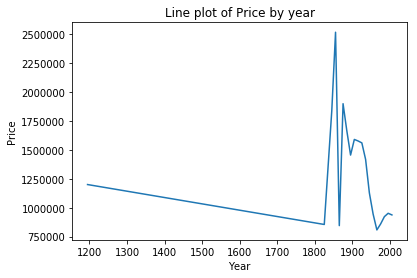

In [146]:
summary["Price"].plot()
plt.title("Line plot of Price by year")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

In [147]:
table = df.groupby(['Suburb','Type'])["Price"].mean().sort_values(ascending=True)
print(len(table))

680


In [148]:
df = pd.read_csv("Melbourne_housing_FULL.csv")

In [149]:
df = df.loc[((df['Rooms'].isnull() == False) & 
             (df['Price'].isnull() == False) & 
             (df['Distance'].isnull() == False) & 
             (df['Bedroom2'].isnull() == False) & 
             (df['Bathroom'].isnull() == False) & 
             (df['Car'].isnull() == False) & 
             (df['BuildingArea'].isnull() == False) & 
             (df['YearBuilt'].isnull() == False)), 
            ["Rooms","Price","Distance","Bedroom2","Bathroom","Car","BuildingArea","YearBuilt"]]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10079 entries, 2 to 34856
Data columns (total 8 columns):
Rooms           10079 non-null int64
Price           10079 non-null float64
Distance        10079 non-null float64
Bedroom2        10079 non-null float64
Bathroom        10079 non-null float64
Car             10079 non-null float64
BuildingArea    10079 non-null float64
YearBuilt       10079 non-null float64
dtypes: float64(7), int64(1)
memory usage: 708.7 KB


In [150]:
summary = df.describe()
summary

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,BuildingArea,YearBuilt
count,10079.000000,1.007900e+04,10079.000000,10079.000000,10079.000000,10079.000000,10079.000000,10079.000000
mean,3.111023,1.084992e+06,11.522899,3.092469,1.657803,1.706519,150.324965,1967.151999
std,0.961595,6.795828e+05,7.056902,0.964019,0.717676,0.968950,87.674767,36.804368
min,1.000000,1.310000e+05,0.000000,0.000000,1.000000,0.000000,0.000000,1196.000000
25%,3.000000,6.350000e+05,6.500000,2.000000,1.000000,1.000000,100.000000,1950.000000
50%,3.000000,8.900000e+05,10.500000,3.000000,2.000000,2.000000,133.000000,1970.000000
75%,4.000000,1.330000e+06,14.300000,4.000000,2.000000,2.000000,181.000000,2000.000000
max,12.000000,9.000000e+06,48.100000,12.000000,9.000000,10.000000,3112.000000,2019.000000


In [151]:
df.corr()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,BuildingArea,YearBuilt
Rooms,1.000000,0.470044,0.271784,0.967702,0.628173,0.407283,0.615859,0.014795
Price,0.470044,1.000000,-0.244953,0.457115,0.459883,0.206978,0.506572,-0.318494
Distance,0.271784,-0.244953,1.000000,0.278175,0.126710,0.252997,0.136746,0.320289
Bedroom2,0.967702,0.457115,0.278175,1.000000,0.630610,0.411051,0.605674,0.024259
Bathroom,0.628173,0.459883,0.126710,0.630610,1.000000,0.318455,0.564912,0.198610
Car,0.407283,0.206978,0.252997,0.411051,0.318455,1.000000,0.322273,0.137710
BuildingArea,0.615859,0.506572,0.136746,0.605674,0.564912,0.322273,1.000000,0.066939
YearBuilt,0.014795,-0.318494,0.320289,0.024259,0.198610,0.137710,0.066939,1.000000


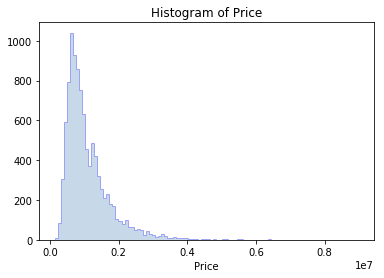

In [152]:
plt.hist(df.Price,
         bins=100,
         density=False,
         histtype='stepfilled', 
         alpha=0.3,
         color='steelblue',
         edgecolor='blue')
plt.title("Histogram of Price")
plt.xlabel("Price")
plt.show()

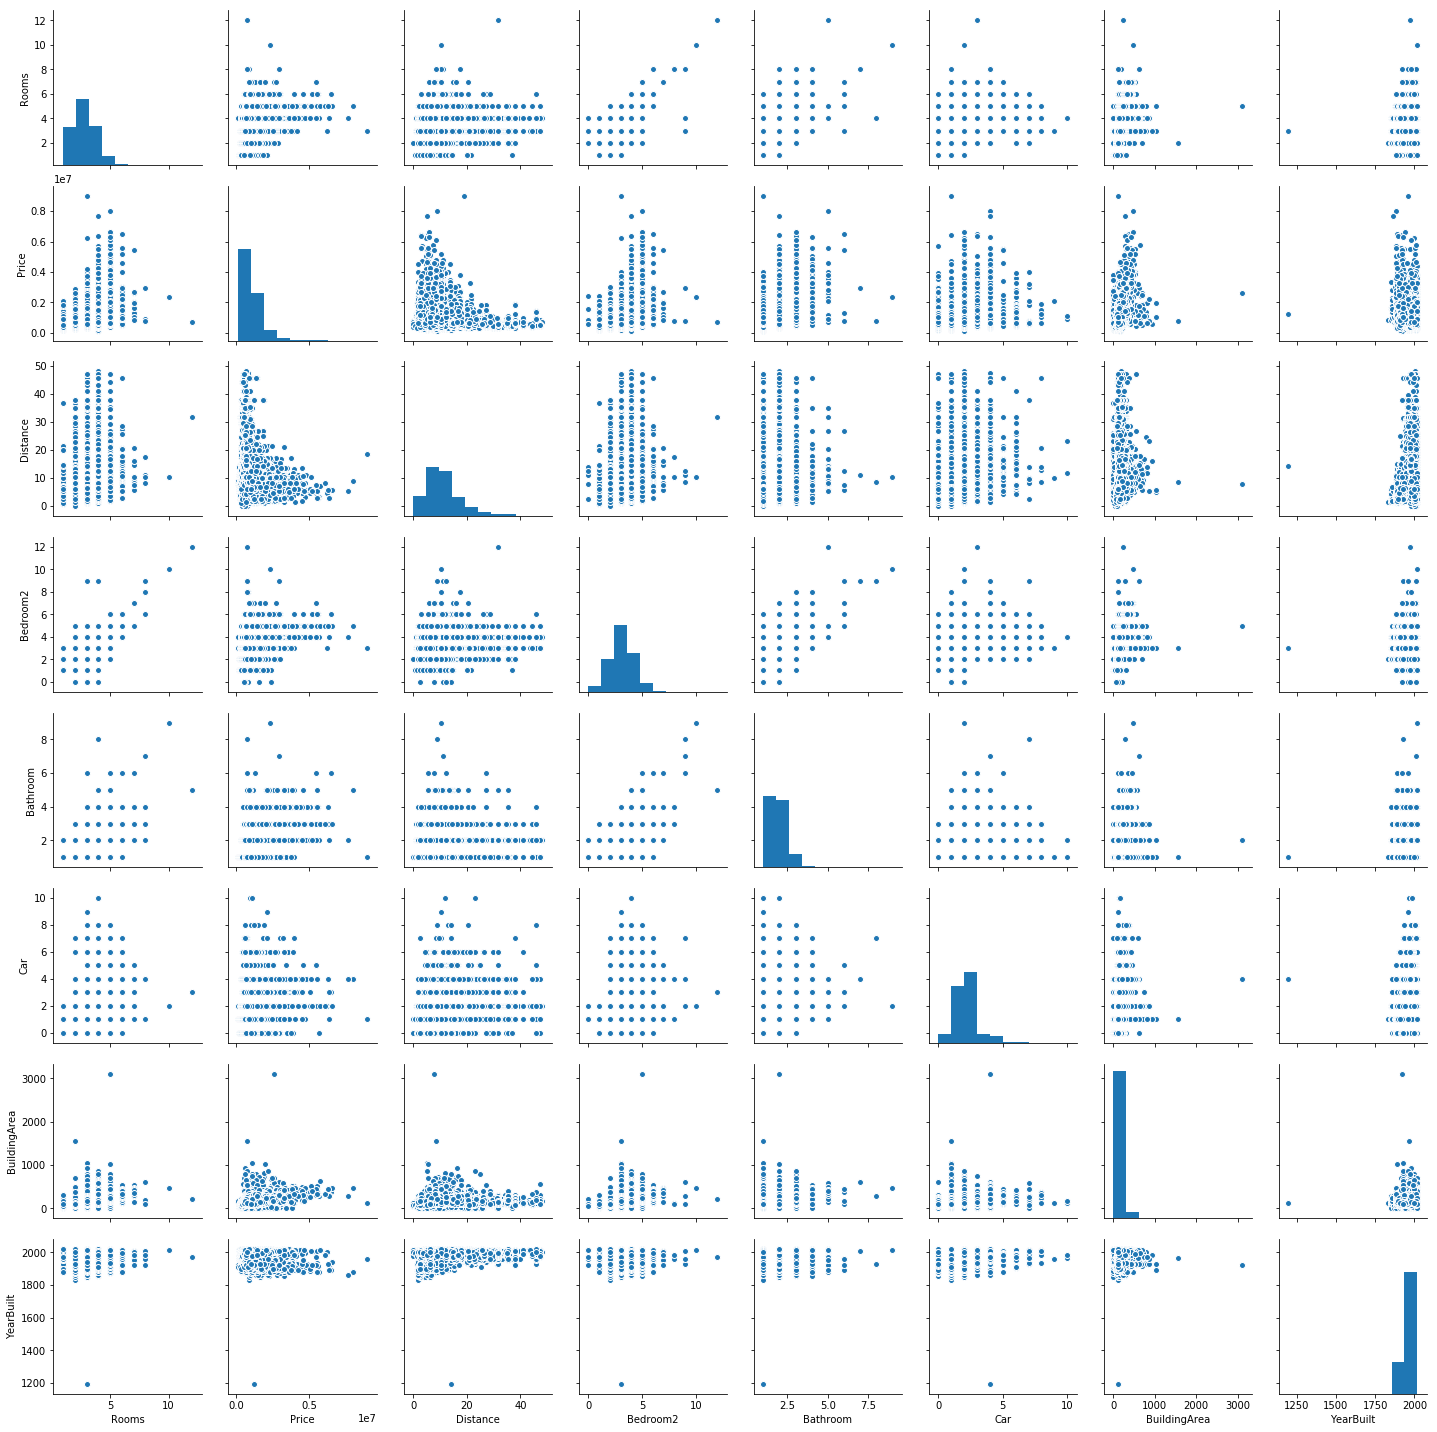

In [153]:
sns.pairplot(df)
plt.show()

# Data Modeling